In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

from functools import reduce

In [22]:
def read_cred():
    f = open("../../../cred.txt", "r")
    cred = f.read()
    f.close()
    return cred

In [23]:
def get_OI(url,start,end,interval='PT1M',tag='xx',auth='xx',hS='00',hF='23'):
	url_all =url+'data-reference='+tag+'&aggregation=TIME'+'&aggregation-function=MEAN'+"&from="+start+"T"+hS+"%3A00%3A00.000Z&to="+end+"T"+hF+"%3A59%3A59.000Z&aggregation-period="+interval
	d_data = pd.read_json(url_all,storage_options={ 'Authorization': 'basic '+ auth})
	# print(d_data['values'][0])
	arr = np.asarray(np.asarray(d_data['values'])[0])
	return d_data['values'][0]

In [24]:
def get_data(tags):
    liste = list(range(0))
    for tag in tags:
        print(tag)
        data = get_OI(urlBase,start_date,end_date,resolution,tag,credentials,'00','23')
        df = pd.DataFrame(data)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
        df = df.rename(columns={'value':tag})
        liste.append(df)
    return liste

In [25]:
def merge_data(liste):
    df = reduce(lambda left,right : pd.merge(left, right,left_index=True,right_index=True,how='outer'),liste)
    return df

In [26]:
# for tag in tags:
#     plt.figure(figsize=(8,6))
# # plt.plot(result[tags[0]],label=tags[0])
#     plt.subplot(121)
#     plt.scatter(result.index ,result[tag],label=tag, c='b', alpha=0.3)
#     plt.legend()
#     plt.subplot(122)
#     sns.histplot(result[tag],label=tag,kde=True,common_norm=True)
#     plt.legend()

# Filtre

In [27]:
def filtering(df):
    df = df[(df['ROC_Bruit_160Hz']>50)]
    df = df[(df['S-FCX69604']>10000)]
    df = df[(df['S-FQ31016']>10000)]
    df = df[(df['ROC_S1_Air_GN']>18)]
    df = df[(df['ROC_S1_Air_GN']<22)]
    df = df[(df['5A-Q98901A']<0.5)]
    return df

In [28]:
def filteringE2(df):
    df = df[(df['ROC_Bruit_160Hz']>50)]
    df = df[(df['E-FCX68604']>10000)]
    df = df[(df['E-FQ31016']>10000)]
    df = df[(df['ROC_S1_Air_GN']>18)]
    df = df[(df['ROC_S1_Air_GN']<22)]
    df = df[(df['5A-Q98901A']<0.5)]
    return df

In [29]:
def get_perf(row):
    crit = 'ROC_Bruit_160Hz'
    if row['ROC_Bruit_160Hz'] > 75:
        ret=10
    elif row['ROC_Bruit_160Hz']>73:
        ret=9
    elif row['ROC_Bruit_160Hz']>71:
        ret=8
    elif row['ROC_Bruit_160Hz']>69:
        ret=7
    elif row['ROC_Bruit_160Hz']>67:
        ret=6
    elif row['ROC_Bruit_160Hz']>65:
        ret=5
    elif row['ROC_Bruit_160Hz']>63:
        ret=4
    elif row['ROC_Bruit_160Hz']>61:
        ret=3
    elif row['ROC_Bruit_160Hz']>59:
        ret=2
    elif row['ROC_Bruit_160Hz']>57:
        ret=1
    else:
        ret =0
    return ret   

In [30]:
def perf_auto(tag,df):
    # print( df[tag].quantile(0.5) )
    # print(df[tag].describe())
    grid=[]
    for i in range(10,100,10):
        grid.append(df[tag].quantile(i/100.0))
    # print(grid)
    return grid

In [31]:
def get_perf2(row):
    v=row['5A-Q98901A']
    for i in range(9):
        if v<perf_grid[i]:
            return i
    return 9

Variables Globales

In [32]:
urlBase = 'https://oianalytics-100.optimistik.fr/api/oianalytics/time-values/query?'
credentials = read_cred()

Variables Spécifiques

In [33]:
start_date = '2022-01-01'
end_date = '2022-05-25'
resolution = 'PT30M'
tags = ['3B-T99994','ROC_Bruit_160Hz','5A-Q98901B','S-FCX69604','ROC_S1_Air_GN','S-FCQX69121','S-S69615','S-FCX69606','S-FQ31016','S-F69703','5A-Q98901A']
tags_E2 = ['ROC_Bruit_160Hz','5A-Q98901B','E-FCX68604','ROC_S1_Air_GN','E-FCQX68121','E-S68613','E-FCX68606','E-FQ31016','E-F68503','5A-Q98901A']
#tags = ['E-T15223','E-T18223','3B-T99994','E-FC16325','E-FCS14325','E-FCS12085','E-FS31053','E-FC33005','E-FQ41504','E-QUR-E2']
#tags = ['E-T15223','E-T18223','E-FCS14325','E-FC16325','E-FCS12085','E-LS18603','E-LC18604','E-LS15603','E-LC15604','E-FS31053','E-PD15010','E-PD18010','3B-T99994','E-QUR-E2','ROC_E2_Prod_MMP_brut','E-FQ41504','E-TC18202','E-TC15202']

In [34]:
df_list = get_data(tags)
data = merge_data(df_list)
result = data.copy()
result = filtering(result)
perf_grid =perf_auto('5A-Q98901A',result)
result['perf'] = result.apply(get_perf2,axis=1)
result.describe()

3B-T99994
ROC_Bruit_160Hz
5A-Q98901B
S-FCX69604
ROC_S1_Air_GN
S-FCQX69121
S-S69615
S-FCX69606
S-FQ31016
S-F69703
5A-Q98901A


3B-T99994  ROC_Bruit_160Hz   5A-Q98901B    S-FCX69604  ROC_S1_Air_GN  \
count  5541.000000      5541.000000  5541.000000  5.541000e+03    5541.000000   
mean     13.471405        69.421976     0.059109  1.647089e+07      20.625646   
std       7.253577         3.414816     0.020005  2.152045e+06       0.497048   
min      -1.103999        58.273717     0.022567  2.570682e+06      19.121832   
25%       8.188858        67.092201     0.046660  1.534403e+07      20.013710   
50%      12.543837        68.869262     0.054119  1.645361e+07      20.962864   
75%      18.438863        71.076953     0.064819  1.763394e+07      21.006282   
max      35.420813        86.620257     0.232871  2.268890e+07      21.959696   

        S-FCQX69121     S-S69615    S-FCX69606     S-FQ31016      S-F69703  \
count  5.541000e+03  5541.000000  5.541000e+03  5.541000e+03  5.541000e+03   
mean   7.993458e+05  1249.976135  8.411575e+06  2.799047e+07  5.454015e+06   
std    1.083745e+05    53.063745  2.144085e+06  6.480098e+06  1.093338e+06   
min    1.219278e+05  1128.739333  4.784289e+06  1.203391e+04  1.700417e+03   
25%    7.437706e+05  1207.506000  6.926035e+06  2.931847e+07  5.000942e+06   
50%    7.937288e+05  1268.218333  8.129821e+06  2.986997e+07  5.570364e+06   
75%    8.580381e+05  1287.972000  9.521597e+06  3.058160e+07  6.155211e+06   
max    1.079512e+06  1339.574333  2.968843e+07  3.136023e+07  7.697256e+06   

        5A-Q98901A         perf  
count  5541.000000  5541.000000  
mean      0.213373     4.500812  
std       0.060542     2.872917  
min       0.108099     0.000000  
25%       0.171978     2.000000  
50%       0.197361     5.000000  
75%       0.238261     7.000000  
max       0.498601     9.000000

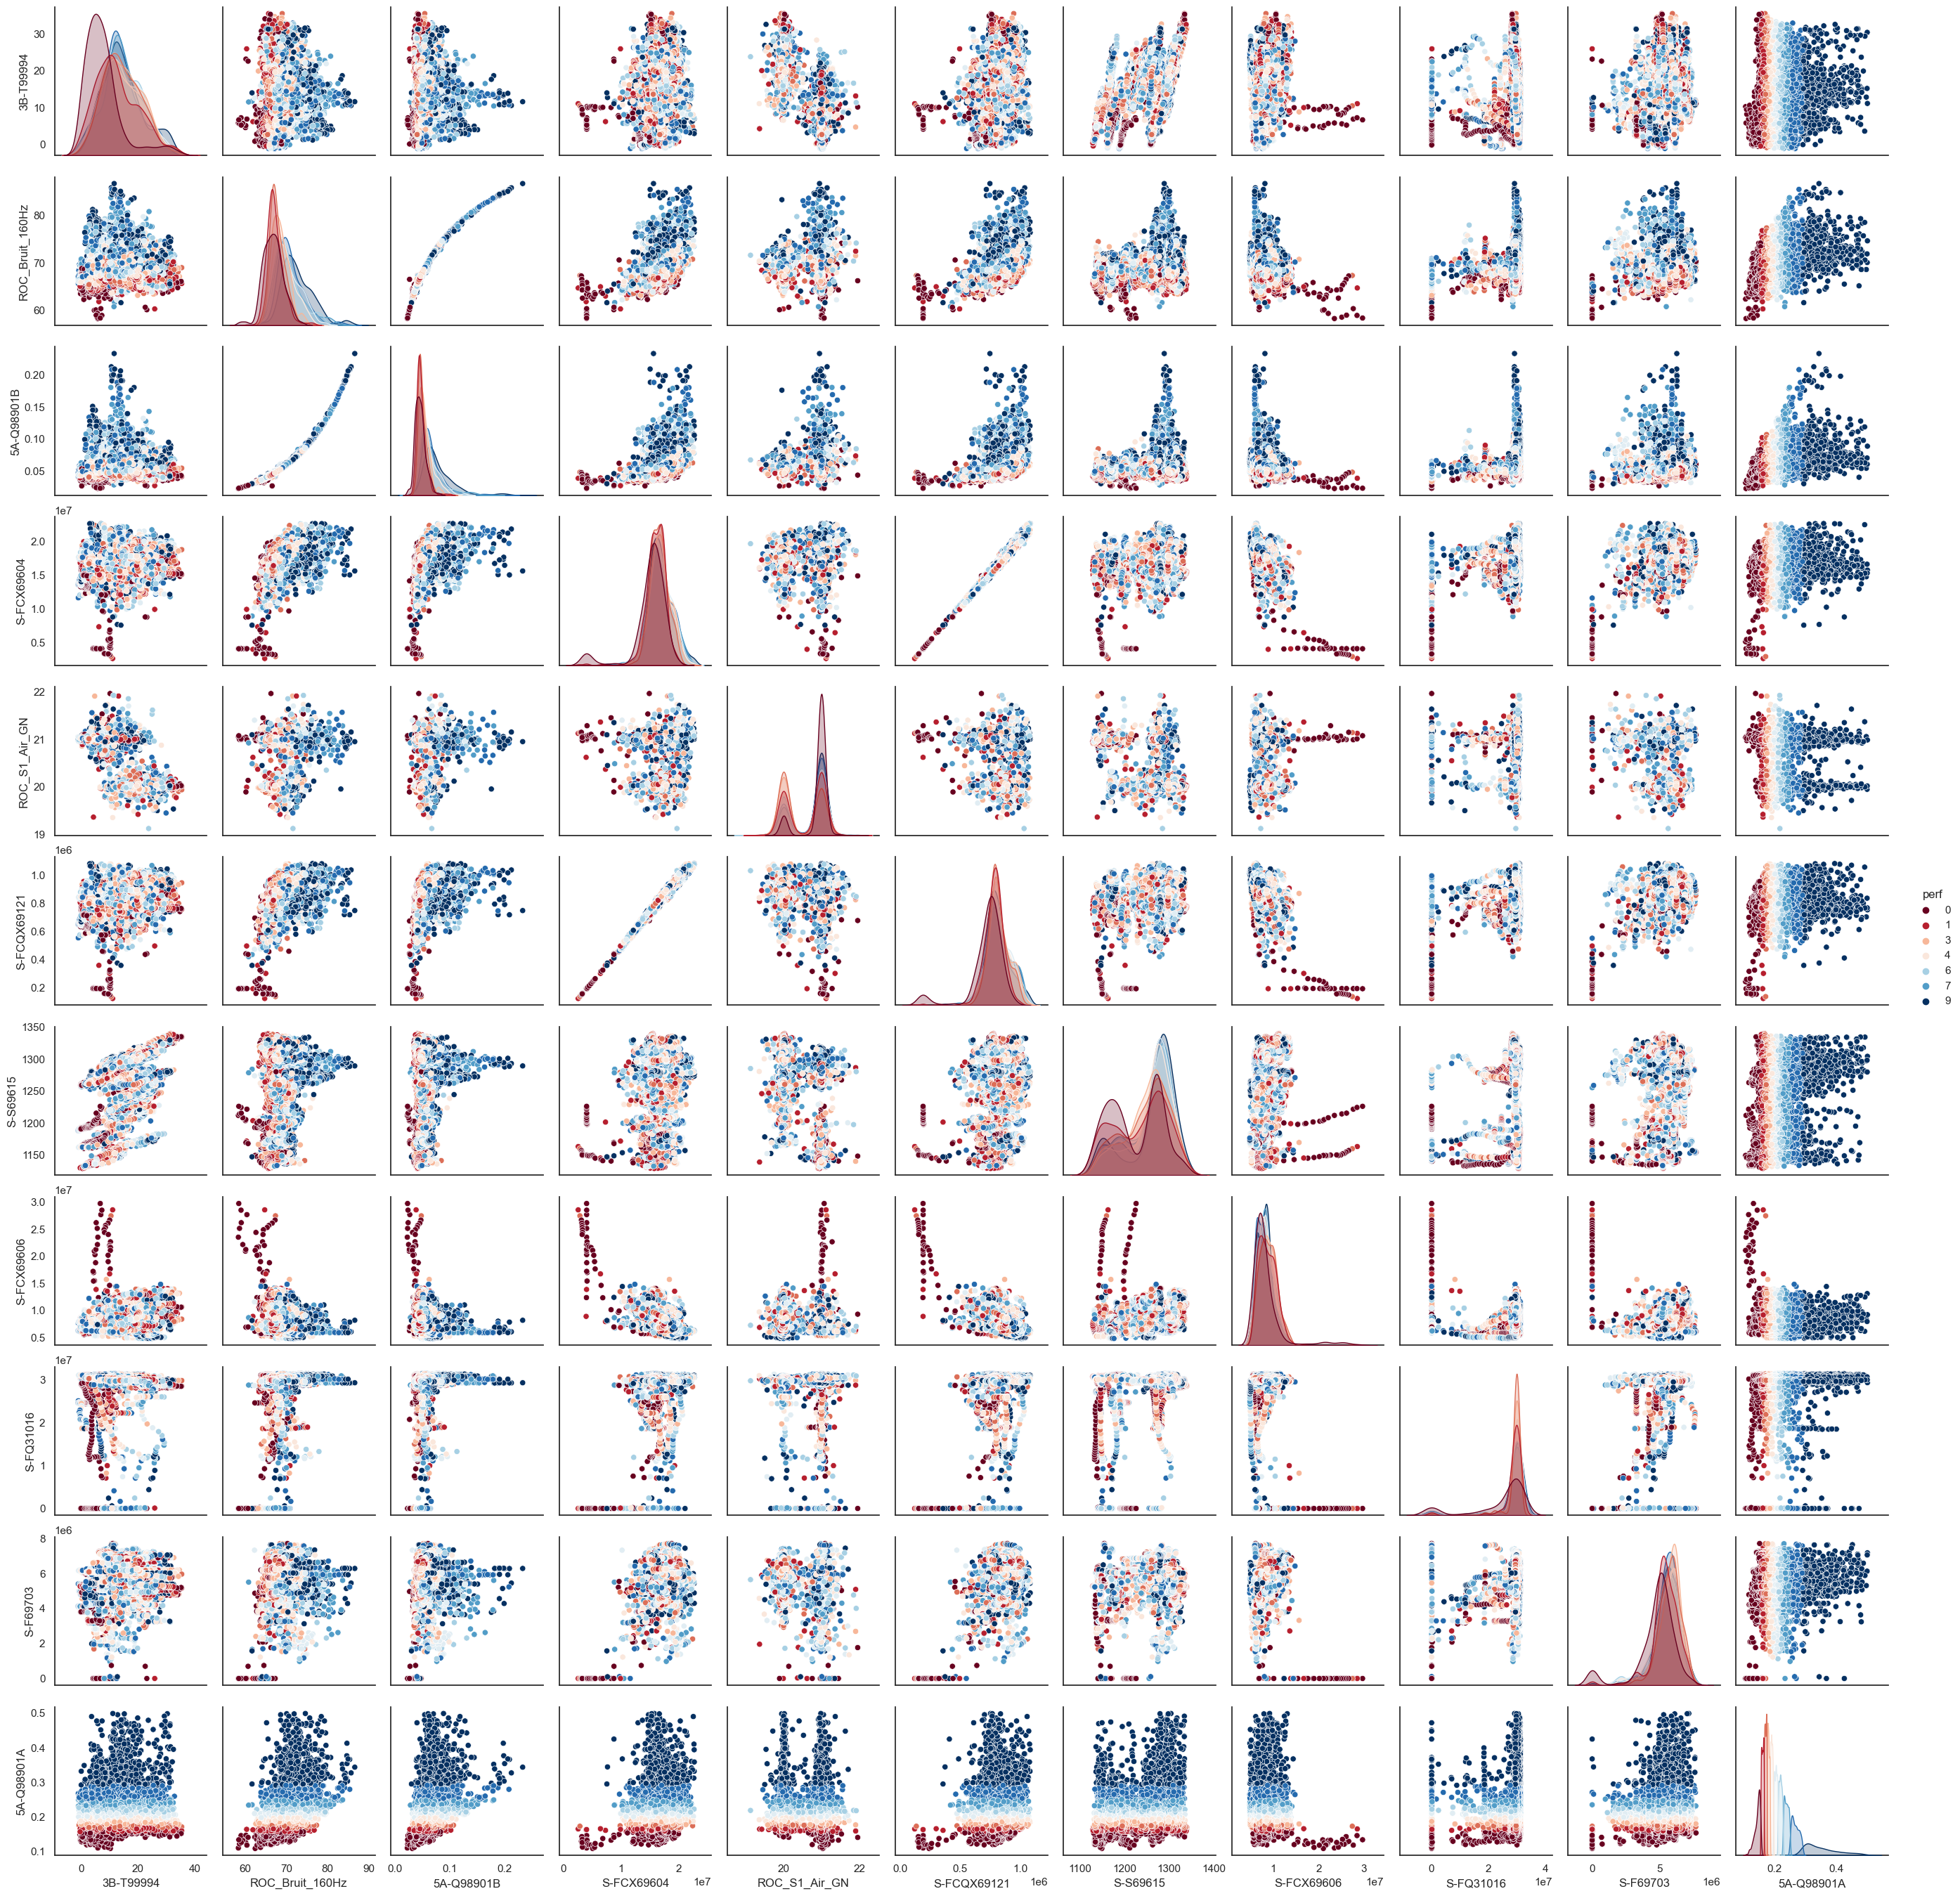

In [35]:
# sns.set_theme(style="ticks")
sns.set_theme(style='white',palette='Blues')
sns.color_palette("tab10")
sns.pairplot(data=result, hue='perf',palette='RdBu') 

In [36]:
start_date = '2022-06-01'
end_date = '2022-06-07'
resolution = 'PT10M'
tags = ['3B-T99994','ROC_S1_Air_GN','S-FQ31016','E-FC16325','S-FC16325','B-FC23008']
df_list = get_data(tags)
data = merge_data(df_list)
data.describe()

3B-T99994
ROC_S1_Air_GN
S-FQ31016
E-FC16325
S-FC16325
B-FC23008


3B-T99994  ROC_S1_Air_GN     S-FQ31016     E-FC16325     S-FC16325  \
count  1008.000000    1008.000000  1.008000e+03  1.008000e+03  1.008000e+03   
mean     23.959413      20.000420  2.837305e+07  6.676518e+06  7.025703e+06   
std       5.033140       0.123654  1.955754e+06  2.390127e+06  4.922034e+05   
min      14.074690      18.934384  2.387123e+07  6.983310e+02  5.929532e+06   
25%      19.936917      19.958533  2.891864e+07  6.307597e+06  7.194432e+06   
50%      23.820555      20.000764  2.913328e+07  7.945650e+06  7.219812e+06   
75%      27.321435      20.037684  2.938786e+07  7.956447e+06  7.242770e+06   
max      36.736850      21.065826  3.012794e+07  8.039036e+06  7.445372e+06   

          B-FC23008  
count  1.008000e+03  
mean   2.702938e+07  
std    5.145179e+06  
min    1.443389e+07  
25%    2.599692e+07  
50%    2.995665e+07  
75%    3.073535e+07  
max    3.106841e+07

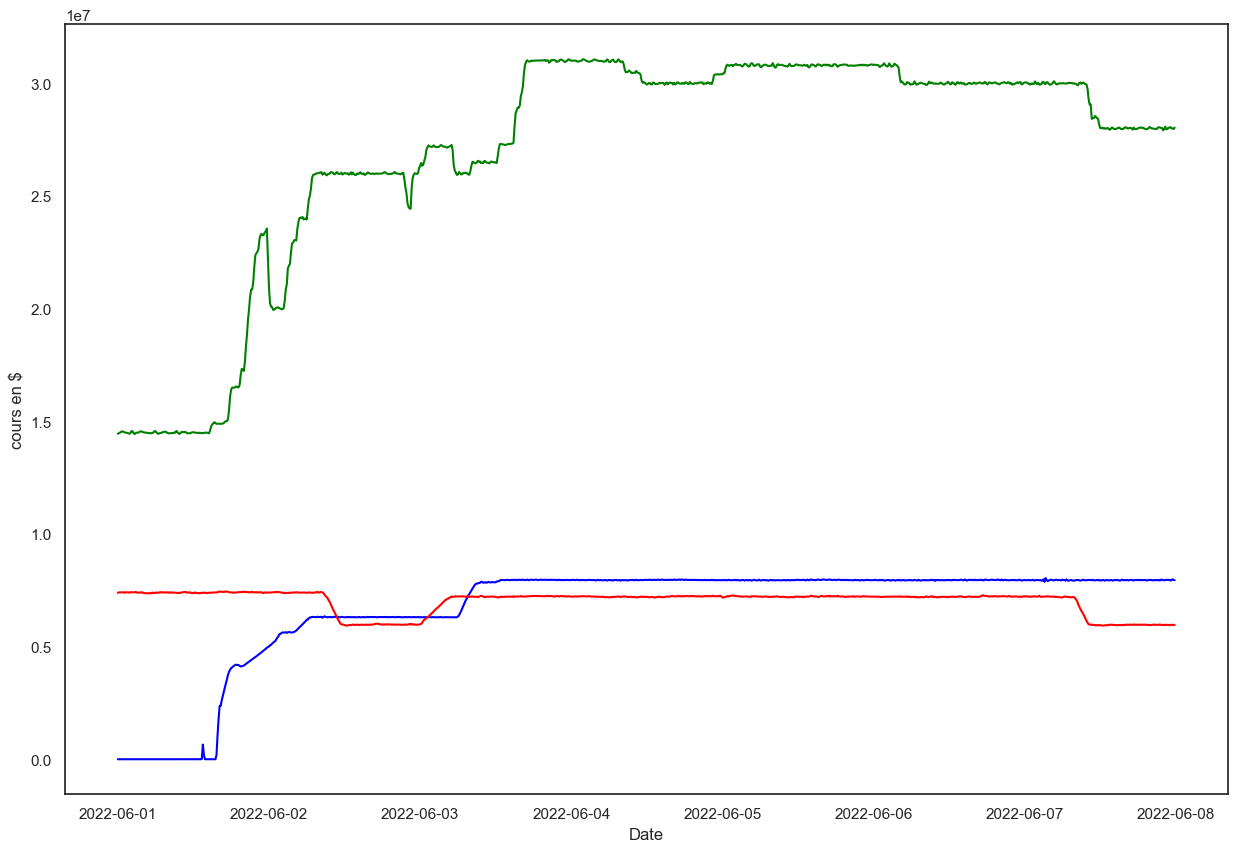

In [37]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('cours en $')
plt.plot(data['E-FC16325'],c='b')
plt.plot(data['S-FC16325'],c='r')
plt.plot(data['B-FC23008'],c='g')
plt.show()